Attribution: Dataset from [Kaggle: Heart Disease Prediction Dataset](https://www.kaggle.com/datasets/nalisha/heart-disease-prediction-dataset?resource=download).

## About the Dataset
This dataset contains medical records of patients used to analyze and predict heart disease, including health features such as age, blood pressure (BP), cholesterol, ECG results, and heart rate

In [1]:
import pandas as pd

df = pd.read_csv('/content/Heart_Disease_Prediction.csv')
display(df.head())
display(df.info())

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

None

### Distribution of Heart Disease

/tmp/ipython-input-1515915425.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart Disease', data=df, palette='viridis', legend=False)


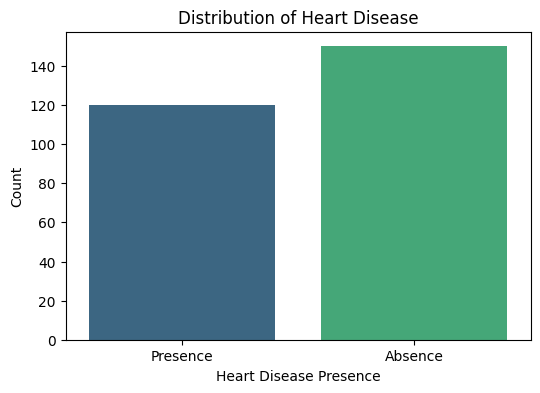

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Heart Disease', data=df, palette='viridis', legend=False)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Count')
plt.show()

In [5]:
!pip install tensorflow

### Distribution of Key Numerical Features

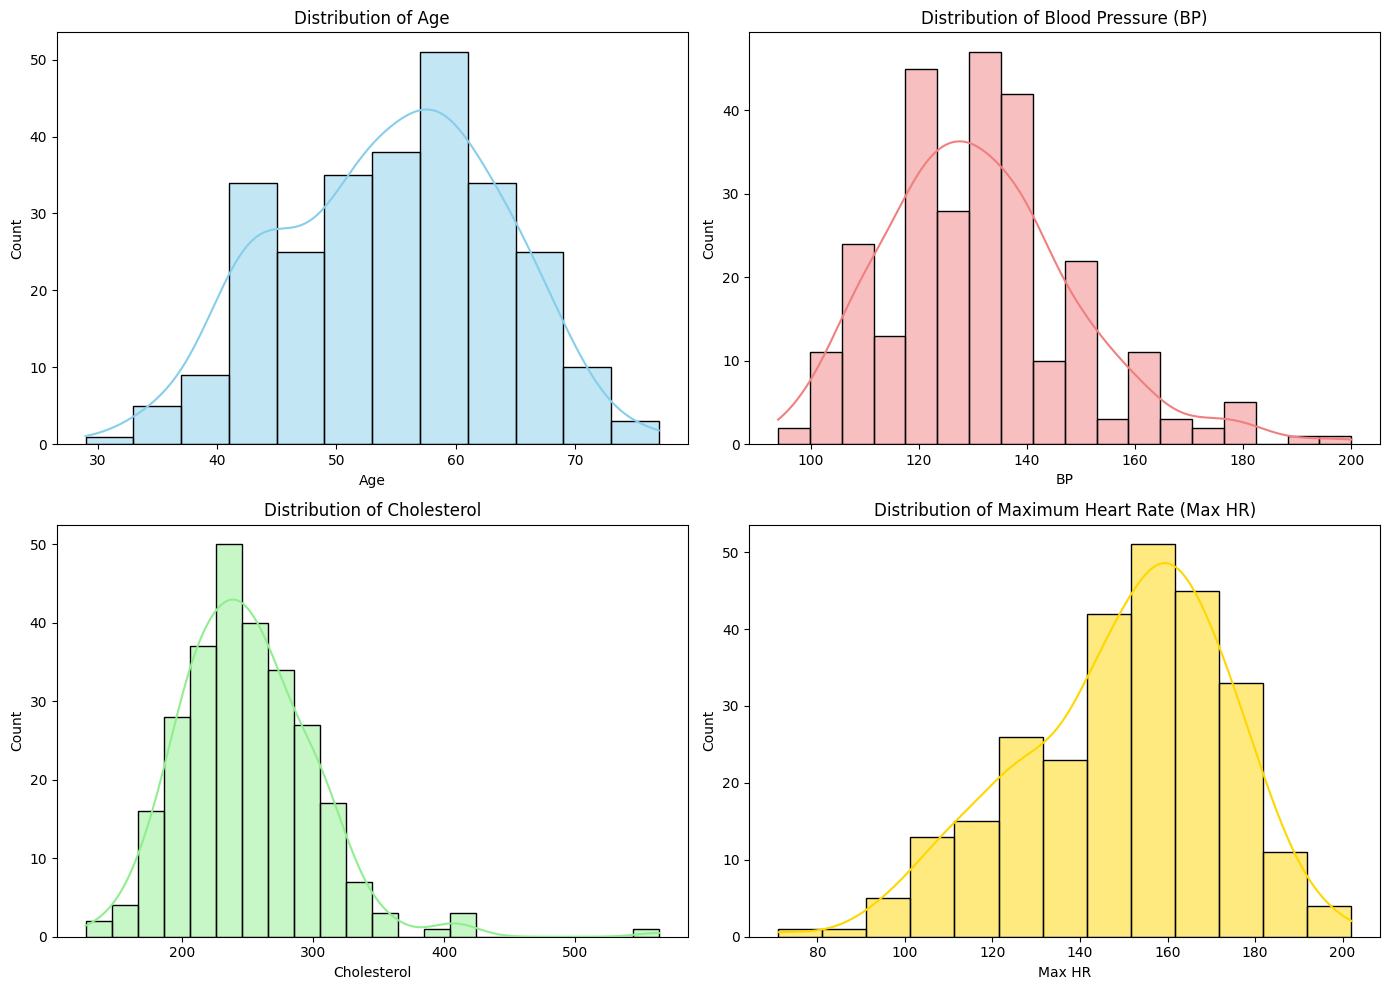

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['Age'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Age')

sns.histplot(df['BP'], kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Distribution of Blood Pressure (BP)')

sns.histplot(df['Cholesterol'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribution of Cholesterol')

sns.histplot(df['Max HR'], kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Distribution of Maximum Heart Rate (Max HR)')

plt.tight_layout()
plt.show()

Build and evaluate a TensorFlow sequential neural network model for binary classification to predict **Heart Disease** given the other variables.  

**Steps:**

1. Preprocess Data
2. Create and Compile Model
3. Train the Model
4. Analyze Model Results

## Preprocess Data
Normalize values and seperate features (X) from target (y) and scale valyes to standardize them. Split the dataset into train/test set

In [23]:
df['Heart Disease'] = df['Heart Disease'].map({'Absence': 0, 'Presence': 1})
print("Converted 'Heart Disease' column to numerical format:")
display(df['Heart Disease'].value_counts())


Converted 'Heart Disease' column to numerical format:


,count
Heart Disease,


In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Reload the DataFrame to revert the 'Heart Disease' column to its original state
df = pd.read_csv('/content/Heart_Disease_Prediction.csv')

# 1. Convert 'Heart Disease' column to numerical format (0 and 1)
# Correctly mapping 'Presence' to 1 and 'Absence' to 0
df['Heart Disease'] = df['Heart Disease'].map({'Absence': 0, 'Presence': 1})
print("Converted 'Heart Disease' column to integer format:")
display(df['Heart Disease'].value_counts())

# 2. Separate features (X) and target (y)
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

# 3. and 4. Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nFeatures scaled successfully.")

# 5. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nData split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Converted 'Heart Disease' column to integer format:


,count
Heart Disease,
0,150
1,120



Features (X) shape: (270, 13)
Target (y) shape: (270,)

Features scaled successfully.

Data split into training and testing sets:
X_train shape: (216, 13)
X_test shape: (54, 13)
y_train shape: (216,)
y_test shape: (54,)


## Define and Compile Model

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# 2. Initialize a Sequential model
model = Sequential()

# Add an Input layer explicitly as the first layer to define the input shape
model.add(Input(shape=(X_train.shape[1],)))

# 3. Add the first Dense layer (input_shape is now inferred from the Input layer)
model.add(Dense(units=64, activation='relu'))

# 4. Add additional hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# 5. Add the output layer for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# 6. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Neural Network Model Summary:")
model.summary()

Neural Network Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

## Train Model

### Subtask:
Train the compiled neural network model using the prepared training data. This step will involve fitting the model to the training features and labels for a specified number of epochs.


**Reasoning**:
To train the model, I will use the `fit` method on the compiled model, passing in the training data (`X_train`, `y_train`), a specified number of epochs, and a batch size, then store the training history.



In [12]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

print("Model training complete. History stored.")

Model training complete. History stored.


## Evaluate Model

In [33]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.6285
Test Accuracy: 0.6481


In [35]:
# create a loss curve plotting function
def plot_loss_curves(history):
    '''
    returns stuff seperately'''
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label=  "val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

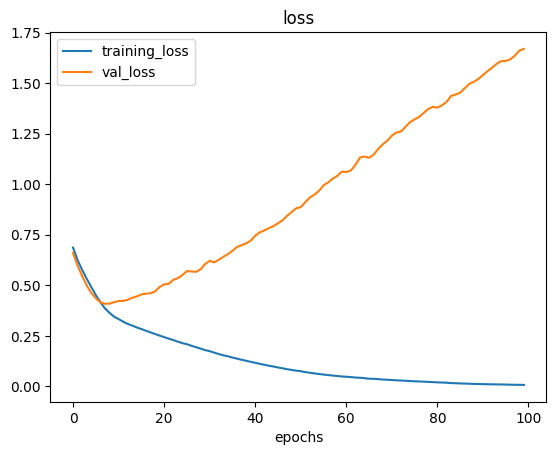

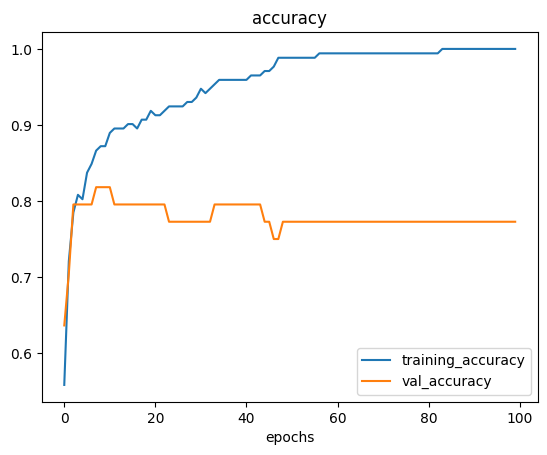

In [36]:
plot_loss_curves(history)

In [37]:
# uhh needs to be improved

In [38]:
final_val_loss = history.history['val_loss'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

Final Validation Loss: 1.6694
Final Validation Accuracy: 0.7727


In [46]:
import numpy as np

new_data = np.array([[60, 1, 3, 140, 250, 0, 1, 150, 0, 1.5, 2, 1, 7]])

new_data_scaled = scaler.transform(new_data)

prediction_raw = model.predict(new_data_scaled)
prediction_class = (prediction_raw > 0.5).astype(int)

if prediction_class[0][0] == 1:
    result = 'Presence'
else:
    result = 'Absence'

print(f"Raw prediction score: {prediction_raw[0][0]:.4f}")
print(f"Predicted Heart Disease: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Raw prediction score: 0.4832
Predicted Heart Disease: Absence


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# it works, but accuracy could be improved.